# Intro To Deep Learning Project
#### Yoav Henig

At this project I walk through this following steps:

##### 1. Browsing the data set
##### 2. Quick view on the data features types and values
##### 3. Organized the data table for running any kind of models
##### 4.

In [1]:
import pandas as pd
import numpy as np
import os

from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

raw_data_path = 'raw_data/'

def create_model():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['Emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'Pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label


def data_to_tf_data(df):
    image_array, image_label = prepare_data(df)
    images = image_array.reshape((image_array.shape[0], 48, 48, 1))
    images = images.astype('float32')/255
    labels = to_categorical(image_label)
    return images, labels

In [2]:
train = pd.read_csv(raw_data_path+'initial_training_data.csv')
train_images, train_labels = data_to_tf_data(train)

val = pd.read_csv(raw_data_path+'validation_test_data.csv')
val_images, val_labels = data_to_tf_data(val)


model = create_model()
class_weight = dict(zip(range(0, 7), (((train['Emotion'].value_counts()).sort_index())/len(train['Emotion'])).tolist()))
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12,
                    batch_size=64)

df = pd.read_csv(raw_data_path+'test_data.csv')
test_images, test_labels = data_to_tf_data(df)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/12
6/6 [==============================] - 2s 304ms/step - loss: 0.3301 - accuracy: 0.2430 - val_loss: 1.9058 - val_accuracy: 0.2449
Epoch 2/12
6/6 [==============================] - 1s 249ms/step - loss: 0.3220 - accuracy: 0.1713 - val_loss: 1.9183 - val_accuracy: 0.2449
Epoch 3/12
6/6 [==============================] - 2s 251ms/step - loss: 0.3031 - accuracy: 0.2835 - val_loss: 2.0540 - val_accuracy: 0.2449
Epoch 4/12
6/6 [==============================] - 2s 253ms/step - loss: 0.2993 - accuracy: 0.2835 - val_loss: 1.8826 - val_accuracy: 0.2449
Epoch 5/12
6/6 [==============================] - 2s 267ms/step - loss: 0.2978 - accuracy: 0.2835 - val_loss: 1.9280 - val_accuracy: 0.2449
Epoch 6/12
6/6 [==============================] - 1s 249ms/step - loss: 0.2938 - accuracy: 0.2835 - val_loss: 2.1333 - val_accuracy: 0.2449
Epoch 7/12
6/6 [==============================] - 2s 271ms/step - loss: 0.3093 - accuracy: 0.2835 - val_loss: 1.9266 - val_accuracy: 0.2449
Epoch 8/12
6/6 [====

In [3]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


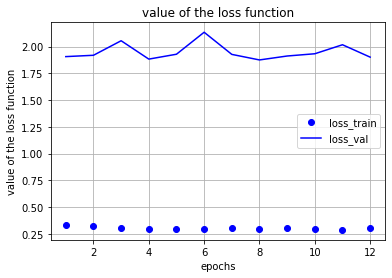

In [4]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()


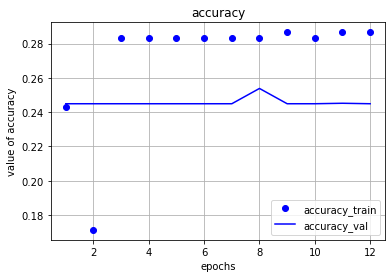

In [5]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

In [6]:
emotions = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}

In [7]:
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['Emotion'] = array1.argmax(axis=1)
    df_array2['Emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

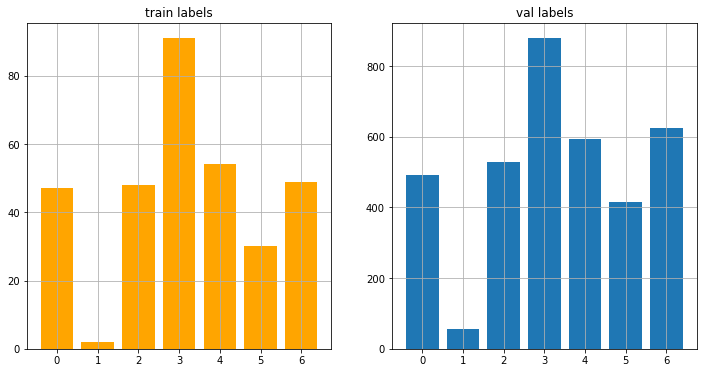

In [8]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

In [9]:
test_loss,test_acc

(1.8920116424560547, 0.24937307834625244)

In [10]:
pred_test_labels = model.predict(test_images)

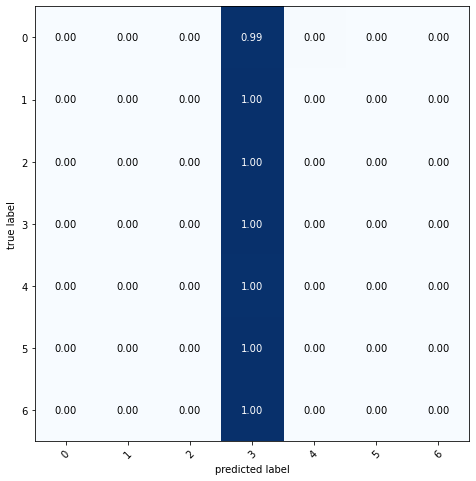

In [11]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))


In [ ]:
# if __name__ == "__main__":
#     train = pd.read_csv(raw_data_path+'initial_training_data.csv')
#     train_images, train_labels = data_to_tf_data(train)

#     val = pd.read_csv(raw_data_path+'validation_test_data.csv')
#     val_images, val_labels = data_to_tf_data(val)


#     model = create_model()
#     class_weight = dict(zip(range(0, 7), (((train['Emotion'].value_counts()).sort_index())/len(train['Emotion'])).tolist()))
#     history = model.fit(train_images, train_labels,
#                         validation_data=(val_images, val_labels),
#                         class_weight = class_weight,
#                         epochs=12,
#                         batch_size=64)

#     df = pd.read_csv(raw_data_path+'test_data.csv')
#     test_images, test_labels = data_to_tf_data(df)
#     test_loss, test_acc = model.evaluate(test_images, test_labels)